score of KMeans : 0.09333333333333334
the Gaussian Mixute score is : 0.3333333333333333
GMM is better


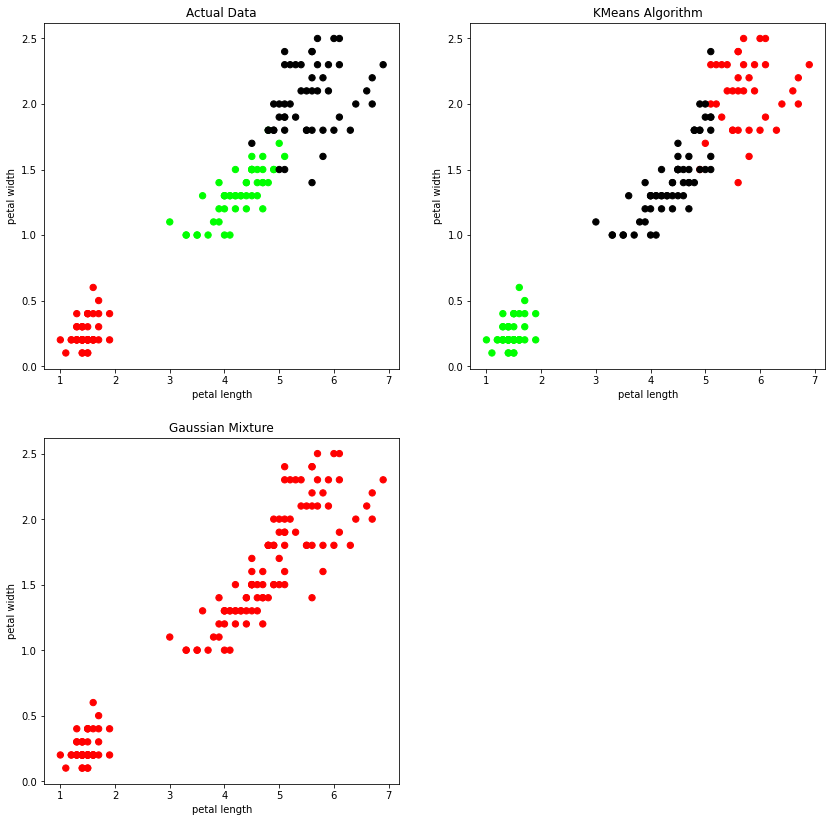

In [7]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt
iris = datasets.load_iris()
x = pd.DataFrame(iris.data)
y = pd.DataFrame(iris.target)

x.columns = np.array(['sepal_legth' , 'sepal_width' , 'petal_length' , 'petal_width'])

y.columns = np.array(['Target'])

classifier = KMeans(n_clusters=3)
classifier.fit(x)

score1 = accuracy_score(y, classifier.labels_)
print("score of KMeans :" , score1)

plt.figure(figsize=(14,14))

colormap = np.array(['red','lime','black'])

plt.subplot(2,2,1)
plt.scatter(x.petal_length , x.petal_width , c=colormap[y.Target] , s=40)
plt.title("Actual Data")
plt.xlabel('petal length')
plt.ylabel('petal width')

plt.subplot(2,2,2)
plt.scatter(x.petal_length , x.petal_width , c=colormap[classifier.labels_] , s=40)
plt.title("KMeans Algorithm")
plt.xlabel('petal length')
plt.ylabel('petal width')

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
xsa = scaler.transform(x)
xs = pd.DataFrame(xsa, columns=x.columns)

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture()
gmm.fit(xs)
gmm_y = gmm.predict(xs)
score2 = accuracy_score(y , gmm_y)
print("the Gaussian Mixute score is :" , score2)

plt.subplot(2,2,3)
plt.scatter(x.petal_length , x.petal_width , c=colormap[gmm_y] , s=40)
plt.title("Gaussian Mixture")
plt.xlabel('petal length')
plt.ylabel('petal width')

if(score1 > score2):
    print("KMeans is better")
else:
    print("GMM is better")

